In [1]:
import pandas as pd
from astropy.io import ascii, fits
from io import StringIO
import splat
import numpy as np
import popsims
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from scipy.interpolate import interp1d

Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database


In [2]:
%matplotlib inline

In [3]:
#Hawley2002 relations
t=r"""SpectralType, r−i, i−z, z−J, i−J, MJ
M0,0.91(0.24),0.49(0.06),1.42(0.50),1.93(0.50),6.45
M1,0.99(0.28),0.50(0.29),1.25(0.08),1.78(0.10),6.72
M2,1.09(0.26),0.62(0.17),1.36(0.18),1.94(0.20),6.98
M3,1.29(0.32),0.73(0.24),1.38(0.12),2.08(0.13),7.24
M4,1.57(0.33),0.87(0.32),1.52(0.13),2.39(0.17),8.34
M5,1.98(0.25),1.09(0.13),1.65(0.09),2.72(0.13),9.44
M6,2.27(0.19),1.27(0.14),1.74(0.08),2.99(0.19),10.18
M7,2.67(0.22),1.52(0.11),1.95(0.16),3.47(0.24),10.92
M8,2.82(0.28),1.62(0.11),2.04(0.12),3.72(0.19),11.14
M9,2.89(0.44),1.79(0.20),2.23(0.14),4.09(0.28),11.43
L0,2.64(0.25),1.85(0.11),2.36(0.14),4.23(0.19),11.72
L1,2.56(0.27),1.92(0.08),2.52(0.08),4.45(0.08),12.00
L2,2.50(0.47),1.85(0.09),2.76(0.36),4.64(0.45),12.29
L3,2.34(0.39),2.00(0.24),2.71(0.19),4.84(0.50),12.58
L4,2.38(0.27),2.26(0.13),2.80(0.08),5.06(0.18),12.87
L5,2.00(0.40),2.47(0.12),2.74(0.23),5.21(0.32),13.16
L6,2.79(0.69),2.40(0.19),2.86(0.15),5.27(0.20),14.31
L7,2.31(0.50),2.98(0.50),2.93(0.50),5.91(0.50),14.45
L8,2.19(0.91),3.15(0.32),2.93(0.02),6.11(0.47),14.58
L9,2.33(0.50),3.18(0.50),2.86(0.50),6.04(0.50),14.72
T0,2.43(0.50),2.88(0.50),2.88(0.50),5.76(0.50),14.86
T1,1.47(0.50),3.39(0.50),3.20(0.50),6.59(0.50),14.99
T2,1.80(0.50),4.25(0.50),3.13(0.50),7.38(0.50),15.13
T3,1.16(0.33),3.48(0.56),3.27(0.31),6.75(0.87),15.27
T4,1.04(0.52),3.82(2.02),3.53(0.06),7.35(2.09),15.40
T6,1.96(0.96),4.00(0.33),3.49(0.06),7.49(0.33),15.68"""

In [4]:
def get_num_and_unc(st):
    return [float(st.split('(')[0]), float(st.split('(')[-1].split(')')[0])]

In [5]:
get_num_and_unc('0.49(0.06)')

[0.49, 0.06]

In [6]:
df=pd.read_csv(StringIO(t), sep=',')
df[[' r−i', ' i−z', ' z−J', ' i−J']]=df[[' r−i', ' i−z', ' z−J', ' i−J']].applymap(get_num_and_unc)

In [7]:
df[' MJ']=df[' MJ'].apply(float)

In [8]:
df.columns

Index(['SpectralType', ' r−i', ' i−z', ' z−J', ' i−J', ' MJ'], dtype='object')

In [9]:
#remove empty spaces
df.columns=['SpectralType', 'r-i', 'i-z', 'z-J', 'i-J', 'MJ']

In [10]:
DATA_FOLDER='/volumes/Lacie/popsimsdata//'

In [11]:
#chris-table
christ_class=pd.read_csv(DATA_FOLDER+'/Optical_MLTs_ctheissen.csv')
christ_phot=pd.read_csv(DATA_FOLDER+'/Optical_MLTs_photometry_ctheissen.csv')


In [12]:
#christ_class.drop3na?

In [13]:
christ_class=christ_class[['objid', 'class', 'subclass']].dropna(subset=['objid'])
christ_class.objid=christ_class.objid.astype(int)
christ_phot.objid=christ_phot.dropna(subset=['objid']).objid.astype(int)

In [14]:
#do an interp method
chis_df=christ_phot.merge(christ_class, on='objid')

In [15]:
len(chis_df)

756

In [16]:
chis_df.to_csv('/volumes/Lacie/ctheissen_sdss_gaia.csv')

In [17]:
#gh

In [18]:
import splat.empirical as spe

In [19]:
schmidt_rel=splat.SPT_COLORS_RELATIONS['schmidt2015']['colors']

In [20]:
schmidt_rel

{'SDSS_I-SDSS_Z': {'spt': [17, 18, 19, 20, 21, 22, 23, 25],
  'values': [1.17, 1.48, 1.66, 1.82, 1.81, 1.86, 2.13]},
 'SDSS_I-2MASS_J': {'spt': [17, 18, 19, 20, 21, 22, 23, 25],
  'values': [3.86, 4.42, 4.91, 5.44, 5.73, 5.83, 5.95, 6.4]},
 'SDSS_Z-2MASS_J': {'spt': [17, 18, 19, 20, 21, 22, 23, 25, 26],
  'values': [1.72, 1.95, 2.14, 2.37, 2.5, 2.59, 2.67, 2.82, 2.76]},
 '2MASS_J-2MASS_H': {'spt': [17, 18, 19, 20, 21, 22, 24, 23, 25, 26],
  'values': [0.61, 0.64, 0.68, 0.74, 0.8, 0.89, 0.91, 0.91, 0.95, 0.96]},
 '2MASS_J-2MASS_KS': {'spt': [17, 18, 19, 20, 21, 22, 24, 23, 25, 26],
  'values': [0.96, 1.03, 1.12, 1.2, 1.31, 1.45, 1.52, 1.47, 1.53, 1.54]},
 '2MASS_H-2MASS_KS': {'spt': [17, 18, 19, 20, 21, 22, 24, 23, 25, 26],
  'values': [0.34, 0.39, 0.43, 0.46, 0.52, 0.56, 0.63, 0.58, 0.6, 0.59]},
 '2MASS_KS-WISE_W1': {'spt': [17, 18, 19, 20, 21, 22, 24, 23, 25, 26],
  'values': [0.18, 0.2, 0.25, 0.32, 0.37, 0.44, 0.41, 0.55, 0.61, 0.75]},
 'WISE_W1-WISE_W2': {'spt': [17, 18, 19, 20, 21,

In [21]:
df.columns

Index(['SpectralType', 'r-i', 'i-z', 'z-J', 'i-J', 'MJ'], dtype='object')

In [22]:
spgrid= np.arange(10, 39)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


[(0.0, 3.0)]

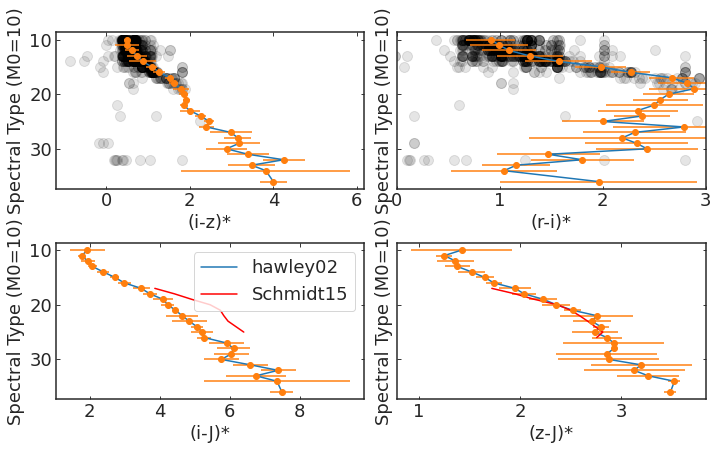

In [23]:
fig, ((ax, ax1), (ax2, ax3))=plt.subplots(ncols=2,  nrows=2, \
                                          figsize=(10, 6), sharey=True)
col='i-z'
ax.scatter(chis_df['psfmag_i']-chis_df['psfmag_z'], 
            chis_df['subclass'].apply(splat.typeToNum),\
           c='k', alpha=0.1, s=100, label='CT SDSS')

ax1.scatter(chis_df['psfmag_r']-chis_df['psfmag_i'], 
            chis_df['subclass'].apply(splat.typeToNum),\
           c='k',alpha=0.1, s=100, label='C SDSS')

for col, a in zip(['i-z', 'r-i', 'i-J', 'z-J'], [ax, ax1, ax2, ax3]):

    a.plot(np.vstack(df[col].values)[:,0],\
            df.SpectralType.apply(splat.typeToNum).values, 
          label='hawley02')

    a.errorbar(np.vstack(df[col].values)[:,0],\
            df.SpectralType.apply(splat.typeToNum).values, \
                xerr=np.vstack(df[col].values)[:,1], fmt='o')
   

    a.set(xlabel='('+col+')*', ylabel='Spectral Type (M0=10)')
ax2.plot(spe.typeToColor(spgrid, 'SDSS_I-2MASS_J', \
                            reference='schmidt2015')[0], \
         spgrid, \
         label='Schmidt15', c='r')
ax3.plot(spe.typeToColor(spgrid, 'SDSS_Z-2MASS_J', \
                            reference='schmidt2015')[0], \
         spgrid, \
         label='Schmidt15', c='r')
ax2.legend(loc='upper right')
plt.tight_layout()
ax.invert_yaxis()
ax1.set(xlim=[0, 3])

In [24]:
SCHMIDT_COLOR_MI_RELATIONS={'i-z': [(7.13, 0.23), (4.88, 0.15), [1.0, 2.9]],\
                        'i-J': [(5.17, 0.27), (2.61, 0.08), [2.5, 5,8]], \
                        'i-k': [(5.41, 0.30), (1.95, 0.07), [3.4, 7.5]]}

def absolute_mag_color_schmidt(x, color_key):
    #x is a float
    coeffs= SCHMIDT_COLOR_RELATIONS[color_key]
    #linear regression 
    a0= np.random.normal(coeffs[0][0], coeffs[0][-1], 1000)
    a1=np.random.normal(coeffs[1][0], coeffs[1][-1], 1000)
    y= a0+a1*x
    #trim                  
    y=y[np.logical_and(x >coeffs[-1][0], x <coeffs[-1][-1])]
    return np.nanmean(y), np.nanstd(y)

def absolute_mag_spt_schmidt(spt, flt):
    return 


In [25]:
pol={'colors': {'hawley2002' : {}}}

In [26]:
for k in ['r-i', 'i-z', 'z-J', 'i-J']:
    dic={k:{'pol': interp1d(df.SpectralType.apply(splat.typeToNum).values, \
                               np.vstack(df[k].values)[:,0], \
                            bounds_error=False,
                           fill_value=np.nan) ,\
            'method': 'interpolation',\
            'vals':  np.vstack(df[k].values)[:,0] ,\
            'spt': df.SpectralType.apply(splat.typeToNum).values, \
            'unc':   np.vstack(df[k].values)[:,1]}}
    pol['colors']['hawley2002'].update(dic)

In [27]:
ABS_MAG_FILE='/users/caganze/research/popsims/data/polynomial_relations.pkl'

In [28]:
abs_mag_data=pd.read_pickle(ABS_MAG_FILE)

In [29]:
abs_mag_data.update(pol)

In [34]:
abs_mag_data

{'WFIRST_WFIJ': (poly1d([-1.17846846e-06,  2.03675645e-04, -1.41916784e-02,  5.11571631e-01,
         -1.00931495e+01,  1.03974118e+02, -4.27734425e+02]),
  0.4002623636462089),
 'WFIRST_WFIY': (poly1d([-9.99077723e-07,  1.77554605e-04, -1.26758839e-02,  4.66966198e-01,
         -9.39365321e+00,  9.84026038e+01, -4.10496689e+02]),
  0.4003676102560627),
 'WFIRST_WFIZ': (poly1d([-1.33596080e-06,  2.34737193e-04, -1.66183074e-02,  6.07640605e-01,
         -1.21218881e+01,  1.25506376e+02, -5.18787029e+02]),
  0.4052036750417236),
 'WFIRST_WFIH': (poly1d([-1.42368157e-06,  2.43824138e-04, -1.69136114e-02,  6.09312051e-01,
         -1.20436327e+01,  1.24307799e+02, -5.13986641e+02]),
  0.40028829145343264),
 'WFIRST_WFIF': (poly1d([-1.47647684e-06,  2.46378198e-04, -1.67272739e-02,  5.91700330e-01,
         -1.15152016e+01,  1.17350239e+02, -4.79614491e+02]),
  0.4004525141313059),
 'WFIRST_WFIR': (poly1d([-6.33751218e-06,  1.01951256e-03, -6.67149192e-02,  2.27030096e+00,
         -4.2337

In [36]:
#import pickle
#output = open(ABS_MAG_FILE, 'wb')
#pickle.dump(abs_mag_data, output)
#output.close()